In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("saudi-pro-league-transfers.csv")
data.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_involved_country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Unknown
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,England
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Retired
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Retired


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8060 entries, 0 to 8059
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   club_name              8060 non-null   object 
 1   player_name            8060 non-null   object 
 2   age                    7944 non-null   float64
 3   position               8060 non-null   object 
 4   club_involved_name     8060 non-null   object 
 5   fee                    8046 non-null   object 
 6   transfer_movement      8060 non-null   object 
 7   transfer_period        8060 non-null   object 
 8   fee_cleaned            2437 non-null   float64
 9   league_name            8060 non-null   object 
 10  year                   8060 non-null   int64  
 11  season                 8060 non-null   object 
 12  country                8060 non-null   object 
 13  club_involved_country  8060 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 881.7+

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7944.0,26.223565,3.997559,16.0,23.0,26.0,29.0,45.0
fee_cleaned,2437.0,0.798920,4.074986,0.0,0.0,0.0,0.0,90.0
year,8060.0,2015.873449,5.138544,2000.0,2013.0,2017.0,2020.0,2024.0


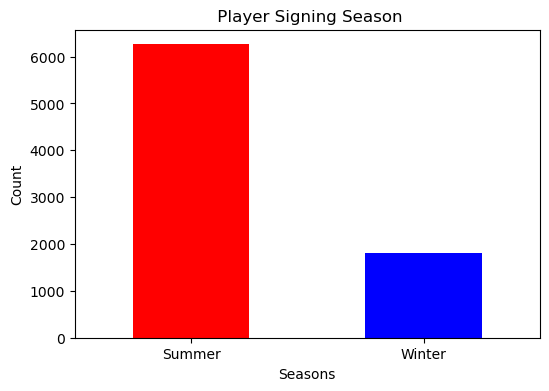

In [5]:
counts = data["transfer_period"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["red", "blue"])

plt.title(" Player Signing Season")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


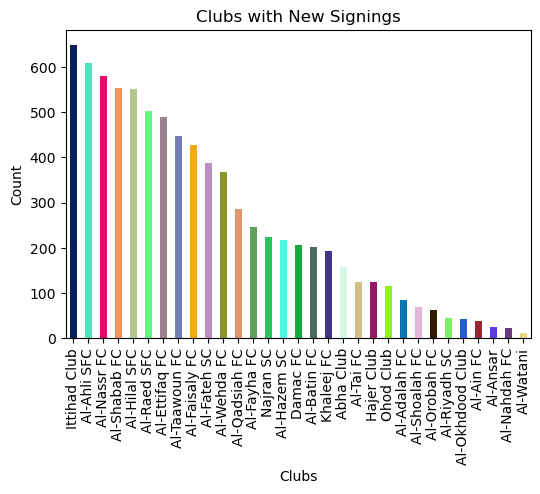

In [6]:
clubs = data["club_name"].value_counts()
colors = np.random.rand(len(clubs), 3)
# Plot bar chart
plt.figure(figsize=(6,4))
clubs.plot(kind="bar", color = colors)

plt.title("Clubs with New Signings")
plt.xlabel("Clubs")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x700 with 0 Axes>

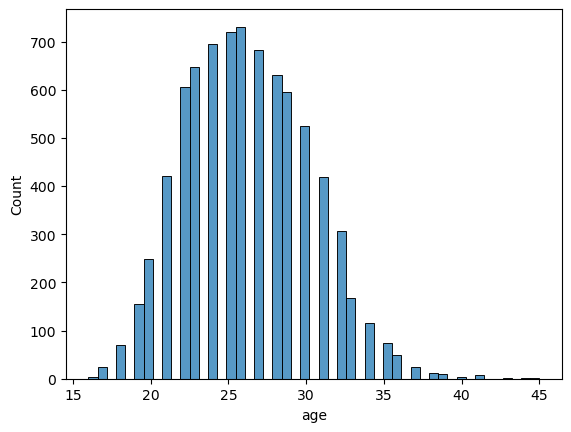

<Figure size 1200x700 with 0 Axes>

In [7]:
sns.histplot(x = 'age', data=data);
plt.figure(figsize=(12, 7))

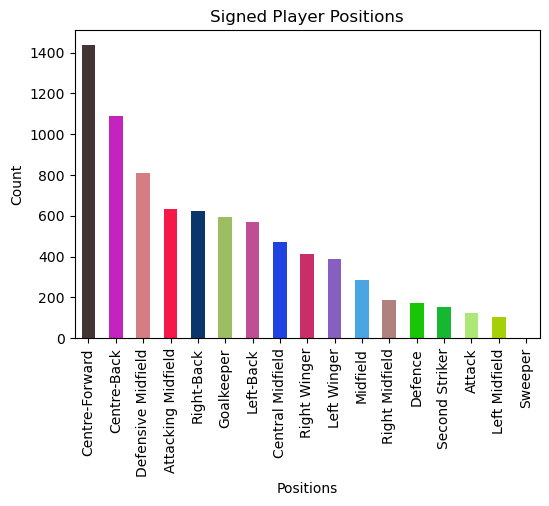

In [8]:
positions = data["position"].value_counts()
colors = np.random.rand(len(positions), 3)
# Plot bar chart
plt.figure(figsize=(6,4))
positions.plot(kind="bar", color = colors)

plt.title("Signed Player Positions")
plt.xlabel("Positions")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


In [9]:
data.position.value_counts()

Centre-Forward        1438
Centre-Back           1091
Defensive Midfield     809
Attacking Midfield     635
Right-Back             622
Goalkeeper             592
Left-Back              569
Central Midfield       473
Right Winger           413
Left Winger            386
Midfield               284
Right Midfield         189
Defence                175
Second Striker         151
Attack                 125
Left Midfield          106
Sweeper                  2
Name: position, dtype: int64

In [10]:
# Get value counts
value_counts = data["position"].value_counts()

# Convert to DataFrame
pos = value_counts.reset_index()

# Rename columns
pos.columns = ["position", "Count"]

pos
#['Count']


,position,Count
0,Centre-Forward,1438
1,Centre-Back,1091
2,Defensive Midfield,809
3,Attacking Midfield,635
4,Right-Back,622
5,Goalkeeper,592
6,Left-Back,569
7,Central Midfield,473
8,Right Winger,413
9,Left Winger,386


In [11]:
# Define mapping (group similar names)
mapping = {
    "Centre-Forward": "Striker",
    "Second Striker": "Striker",
    "Attack": "Striker",
    "Left Winger": "Winger",
    "Right Winger": "Winger",
    "Left-Back": "Defence",
    "Right-Back": "Defence",
    "Centre-Back": "Defence",
}
# Replace names with mapped values (default = itself if not in mapping)
pos["position_grouped"] = pos["position"].replace(mapping)

# Group by new categories and sum counts
pos_grouped = pos.groupby("position_grouped", as_index=False)["Count"].sum()

print(pos_grouped)


      position_grouped  Count
0   Attacking Midfield    635
1     Central Midfield    473
2              Defence   2457
3   Defensive Midfield    809
4           Goalkeeper    592
5        Left Midfield    106
6             Midfield    284
7       Right Midfield    189
8              Striker   1714
9              Sweeper      2
10              Winger    799


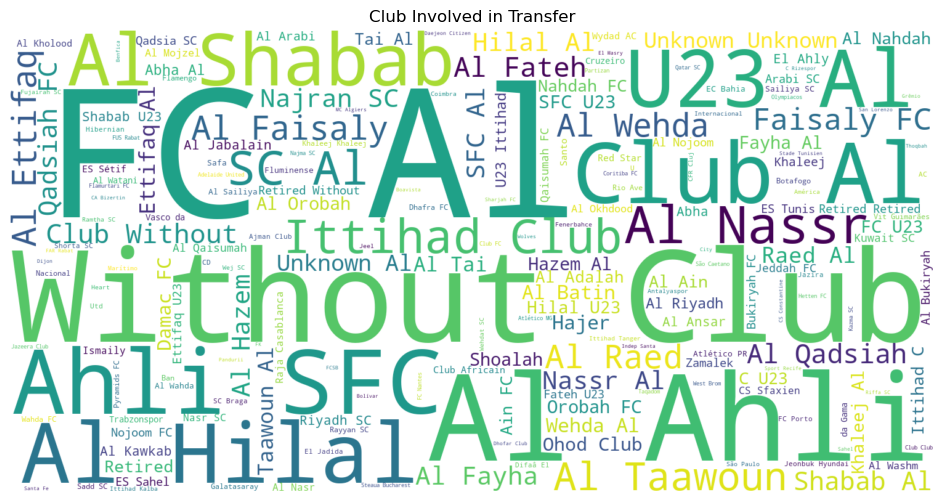

In [12]:
from wordcloud import WordCloud
text = " ".join(data["club_involved_name"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=1500, height=750, 
                      background_color="white",
                      colormap="viridis",   # You can change colormap for colors
                      max_words=200).generate(text)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Club Involved in Transfer")
plt.show()


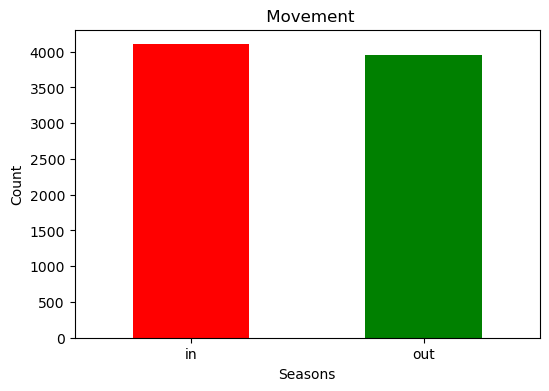

In [13]:
counts = data["transfer_movement"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["red", "green"])

plt.title(" Movement")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [14]:
data.head(2)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_involved_country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Unknown
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,England


In [15]:
data.club_involved_country.unique()

array(['Unknown', 'England', 'Saudi Arabia', 'Retired', 'Greece',
       'Turkey', 'Korea Republic', 'Brazil', 'Morocco', 'Bahrain',
       'Algeria', 'South Africa', 'Qatar', 'Italy', 'Argentina',
       'Germany', 'Russia', 'Tunisia', 'Portugal', 'Scotland', 'Spain',
       'Chile', 'Egypt', 'Mexico', 'Albania', 'Without Club',
       'Netherlands', 'United States', 'Faroe Islands', 'Ivory Coast',
       'Uruguay', 'Iraq', 'Sweden', 'France', 'Ecuador', 'Guatemala',
       'Switzerland', 'Peru', 'United Arab Emirates', 'Austria',
       'Colombia', 'Belgium', 'San Marino', 'Nigeria', 'Angola',
       'Croatia', 'Slovakia', 'Lebanon', 'Ghana', 'Kenya', 'Serbia',
       'Hungary', 'Career break', 'Finland', 'Iran', 'Panama', 'Romania',
       'Japan', 'Denmark', 'Jordan', 'Indonesia', 'Bolivia', 'Australia',
       'Réunion', 'Paraguay', 'Mali', 'Poland', 'Israel', 'New Zealand',
       'Kazakhstan', 'Azerbaijan', 'Ukraine', 'North Macedonia', 'Malta',
       'Bulgaria', 'Bosnia', 'IR 

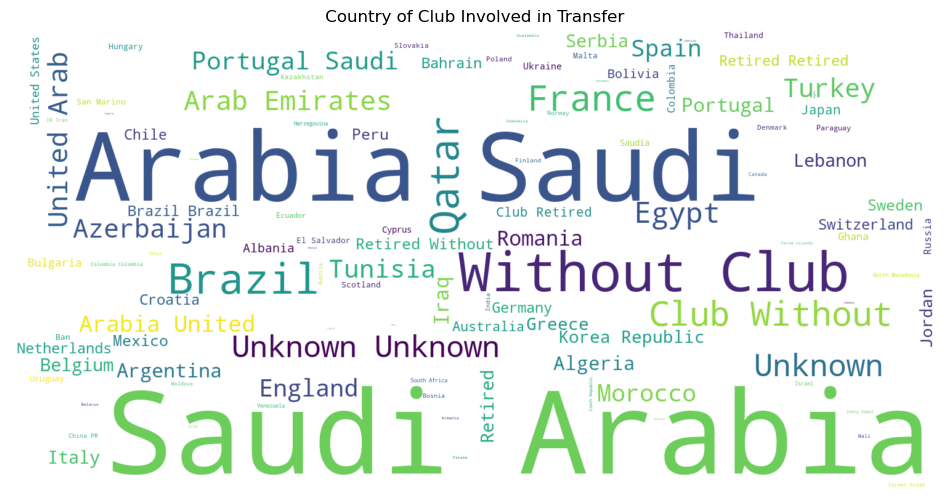

In [16]:
from wordcloud import WordCloud
text = " ".join(data["club_involved_country"].astype(str))
# Generate word cloud
wordcloud = WordCloud(width=1500, height=750, 
                      background_color="white",
                      colormap="viridis",   # You can change colormap for colors
                      max_words=200).generate(text)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(" Country of Club Involved in Transfer")
plt.show()


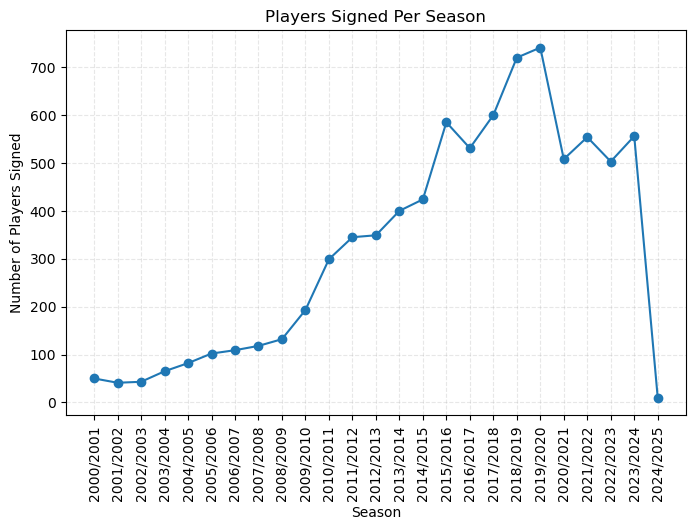

In [17]:

# Count how many players were signed per season
season_counts = data["season"].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(season_counts.index, season_counts.values, marker="o", linestyle="-")

plt.title("Players Signed Per Season")
plt.xlabel("Season")
plt.ylabel("Number of Players Signed")
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


In [18]:
data.head(3)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country,club_involved_country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Unknown
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,England
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia,Saudi Arabia


1. The number of players signed increased from season 2014/2015 to 2023/2024 probably because more money was contributed to Saudi Pro League during these years.

2. Over the years, the number of players sold out is almost equal to new signings

3. The clubs with the major transfers (out) are Al-Hilal, Al-Ahli, Al-Shabab, Players without clubs, Al-Nassr, Ittihad, Ettifaq, Al-Fateh, Al-Faisaly, Al-Hazem, Al-Wehda, Al-Taawoun and Qadsiah

4. Most players bought over the years play at the center forward position

5. Al-Ittihad and Al-Ahli FC signed the most players and Al-watani signed the least

6. Most signings were made during the summer